In [ ]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot & contextily 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
gdf_areas = gpd.read_file("AssignmentData/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp")
gdf_areas.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


In [3]:
pools = gpd.read_file("AssignmentData/swimming_pools.shp")
pools.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


## 1. Overlay Maps

<AxesSubplot:>

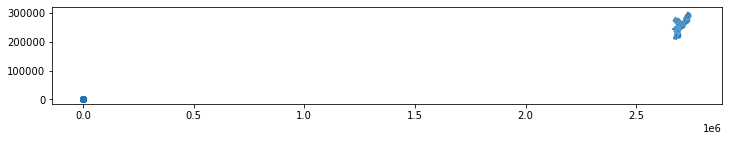

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
gdf_areas.plot(ax=ax)
pools.plot(ax=ax)

In [5]:
gdf_areas.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
pools.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

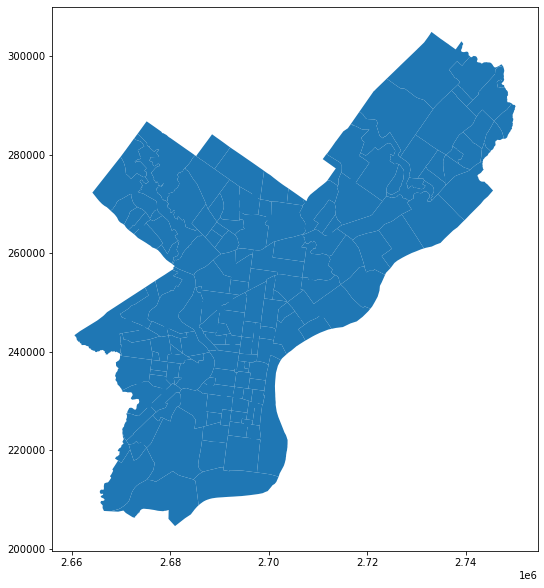

In [7]:
pools_proj = pools.to_crs(gdf_areas.crs)
fig, ax = plt.subplots(figsize=(12,10))

gdf_areas.plot(ax=ax)
pools_proj.plot(ax=ax)


<AxesSubplot:>

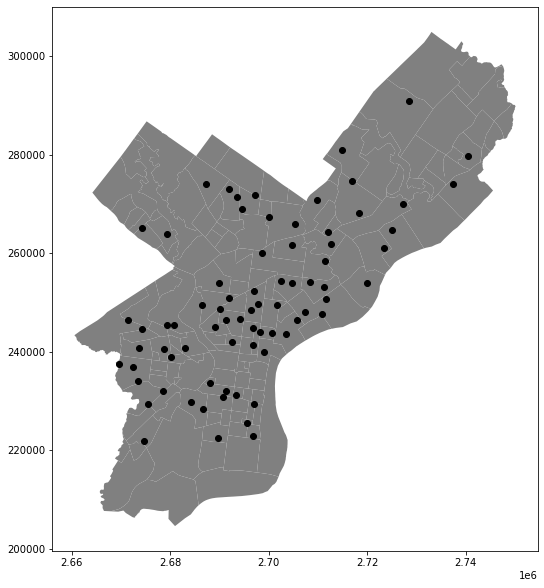

In [8]:
fig, ax = plt.subplots(figsize=(12,10))

gdf_areas.plot(ax=ax, color="gray")
pools_proj.plot(ax=ax, color="black")

## 2. Add Basemaps

NameError: name 'ctx' is not defined

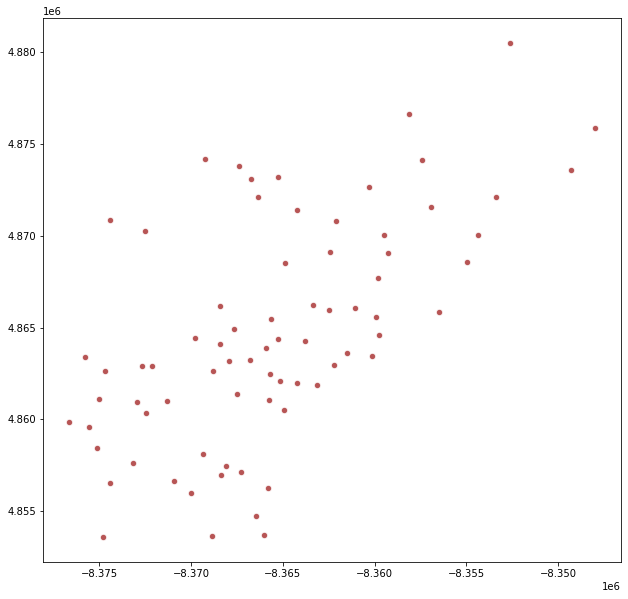

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
pools.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="brown",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite);

## 3. Choropleth Map

In [10]:
incidents = gpd.read_file("AssignmentData/neighbourhod_crimes.Geojson")
incidents.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,Counts,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,282,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<AxesSubplot:>

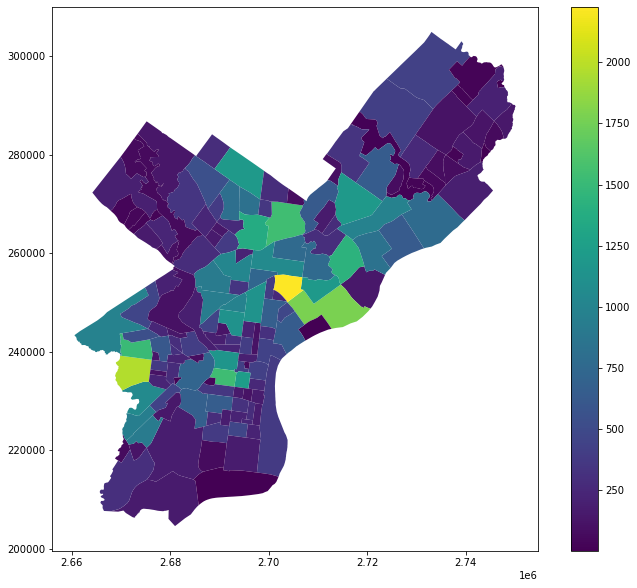

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
incidents.plot(column="Counts", ax=ax, legend=True)

In [12]:
incidents["crime_norm"] = (incidents.Counts / incidents.Shape_Area) 
incidents.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,Counts,geometry,crime_norm
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",0.000003
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",0.000004
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",0.000011
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",0.000002
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,282,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",0.000007


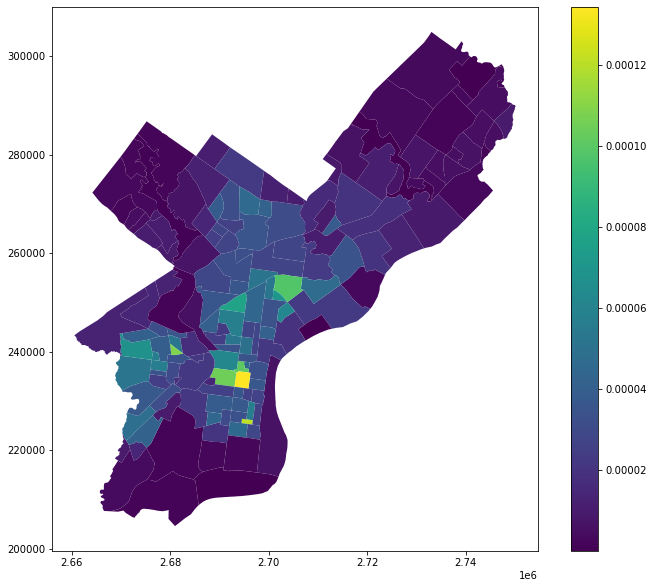

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
incidents.plot(column="crime_norm", ax=ax, legend=True);